<a href="https://colab.research.google.com/github/AbuKaisar24/Detect-left-and-right-eyes-using-using-MobileNet/blob/master/left_right.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir("/content/drive/My Drive/Colab Notebooks/left_right/"))
print(len(os.listdir("/content/drive/My Drive/Colab Notebooks/left_right/train/right")))

['train', 'test', 'validation']
3809


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from glob import glob
import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
img_width, img_height = 240,240
train = '/content/drive/My Drive/Colab Notebooks/left_right/train'
test = "/content/drive/My Drive/Colab Notebooks/left_right/test"
nb_train_samples = 7609
nb_validation_samples = 4000

batch_size = 48

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
from keras.applications import MobileNet
from keras.layers import Dropout,BatchNormalization
conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(240,240,3))
from keras.optimizers import RMSprop,Adam
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(.4))
model.add(layers.Dense(1, activation='sigmoid'))

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")
 
# initialize the validation (and testing) data augmentation object
valid_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
           class_mode='binary')
validation_generator = valid_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
  )

Found 7609 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(.0001), metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
158/158 [==============================] - 359s 2s/step - loss: 0.6533 - acc: 0.7864 - val_loss: 0.2593 - val_acc: 0.9109
Epoch 2/15
158/158 [==============================] - 179s 1s/step - loss: 0.5085 - acc: 0.8245 - val_loss: 0.1719 - val_acc: 0.8942
Epoch 3/15
158/158 [==============================] - 177s 1s/step - loss: 0.4075 - acc: 0.8556 - val_loss: 0.0947 - val_acc: 0.9183
Epoch 4/15
158/158 [==============================] - 175s 1s/step - loss: 0.3656 - acc: 0.8707 - val_loss: 1.2143 - val_acc: 0.8702
Epoch 5/15
158/158 [==============================] - 175s 1s/step - loss: 0.3370 - acc: 0.8779 - val_loss: 0.6572 - val_acc: 0.8459
Epoch 6/15
158/158 [==============================] - 174s 1s/step - loss: 0.3373 - acc: 0.8823 - val_loss: 0.3043 - val_acc: 0.9142
Epoch 7/15
158/158 [==============================] - 174s 1s/step - loss: 0.3019 - acc: 0.8966 - val_loss: 0.2327 - val_acc: 0.8932
Epoch 8/15
158/158 [==============================] - 173s 1s/step - 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

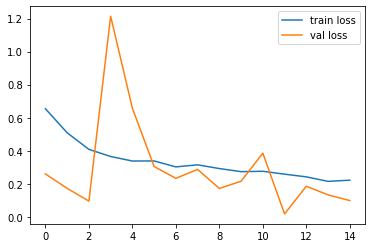

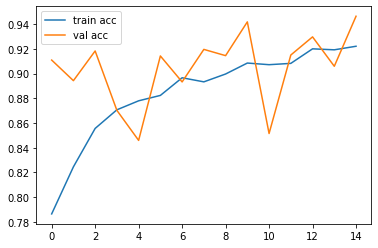

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('/content/left_right.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
import numpy as np
model= load_model('/content/left_right.h5')

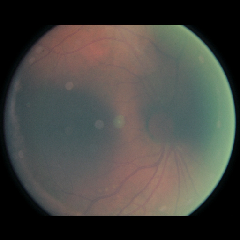

In [ ]:
img = image.load_img('/content/drive/My Drive/Colab Notebooks/left_right/validation/left/9995_left.jpg', target_size=(240,240))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

if classes < .5:
  print('Left Eye')

else:
  print('Right Eye')

Left Eye


In [ ]:
valid = "/content/drive/My Drive/Colab Notebooks/left_right/validation/"
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    valid,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
  )

Found 452 images belonging to 2 classes.


In [ ]:
#Confution Matrix and Classification Report
num_of_test_samples=452
steps = num_of_test_samples/batch_size
Y_pred = model.predict_generator(test_generator, steps)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["left", 'right']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[226   0]
 [226   0]]
Classification Report
              precision    recall  f1-score   support

        left       0.50      1.00      0.67       226
       right       0.00      0.00      0.00       226

    accuracy                           0.50       452
   macro avg       0.25      0.50      0.33       452
weighted avg       0.25      0.50      0.33       452

